# Removing small range cycles from reversals by racetrack filtering
This notebook demonstrates how to apply the racetrack filter to remove reversals from a signal which has rainflow cycles below a certain threshold by keeping the reversal sequence intact

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import rainflow
import fatpack 
from math import sin, cos
import os 
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from bs4 import BeautifulSoup
np.random.seed(10)
print(fatpack.__version__)

0.7.7


First we IMPORT SIGNAL for the Racetrack filtering

In [2]:
# Obtener la ruta del directorio actual
current_directory = os.getcwd()

# Obtener la lista de archivos en el directorio actual
file_list = os.listdir(current_directory)
# Filtrar los archivos que terminan con ".csv"
csv_list = [file for file in file_list if file.endswith(".csv")]

# Imprimir la lista de archivos CSV encontrados
print("Archivos CSV en el directorio actual:")
for csv_file in csv_list:
    print(csv_file)

Archivos CSV en el directorio actual:


In [3]:
csv_file = 'HK-RBK.csv'
file_path = os.path.join(current_directory, csv_file)
print(f"\nArchivo a cargar: {file_path}")
try:
    df = pd.read_csv(file_path)
    print("\nPrimeros 20 registros:")
    print(df.head(20))
     # Cargar la señal desde el archivo CSV utilizando NumPy
    y = df.iloc[:, 0].values  # Seleccionar la primera columna y convertirla en un arreglo de NumPy
     # Calcular las amplitudes y las medias de los rangos de Rainflow
    S, Sm = fatpack.find_rainflow_ranges(y, return_means=True, k=256)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo {csv_file}")

# Crear un rango de tiempo basado en el número de puntos en la señal
time = range(len(y))
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
# Graficar la señal
plt.plot(time, y, label='Señal', color='blue')
# Configurar título y etiquetas de los ejes
plt.title('Señal desde CSV')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
# Mostrar leyenda
plt.legend()
# Mostrar la gráfica
plt.grid(True)
plt.show()

# Mostrar los resultados
y, S, Sm


Archivo a cargar: c:\Users\misasi.LEANET\OneDrive - LEARTIKER S. COOP\PROCEDIMIENTOS\10-PYTHON\GitHub\Rainflow-Fatpack\HK-RBK.csv
Error: No se encontró el archivo HK-RBK.csv


NameError: name 'y' is not defined

# Reverals (peaks and valleys) extracted with and without a racetrack filter (h) with fatpack
here we remove all reversals that produce a rainflow cycle below h=xx (ventana de filtrado o sensivilidad del filtro Racetrack).

La función find_reversals de fatpack encuentra las reversals en una señal:

y: La señal para la cual se están buscando las reversals.

k: El número de bins utilizado para muestrear la señal. Cuantos más bins, más precisión en la detección de reversals, pero  mayor costo computacional.
Ahora, que hace la función:

Divide la señal y en k bins de igual tamaño.
Encuentra los máximos y mínimos locales en cada bin, lo que se conoce como "reversals".
Devuelve dos listas:
rev: Contiene los valores de las reversals.
ix: Contiene las ubicaciones de los índices correspondientes a las reversals

find_reversals_racetrack_filtered - encuentra las reversals filtradas 
descripción de los parámetros:

y: La señal para la cual se están buscando las reversals filtradas.

h: La ventana de filtrado. Este parámetro controla la sensibilidad del filtro Racetrack. Un valor más alto de h significa una mayor suavización de las reversals. Un valor más bajo conserva más detalles en la señal original.

k: El número de bins utilizado para muestrear las señales. Cuantos más bins, más precisión en la detección de reversals, pero también mayor costo computacional.

In [ ]:
rev, ix = fatpack.find_reversals(y, k=256)
rev_rtf, ix_rtf = fatpack.find_reversals_racetrack_filtered(y, h=2, k=256)

# We can then plot the results, we see that the reversals which produce small rainflow ranges are removed from the filtered reversals

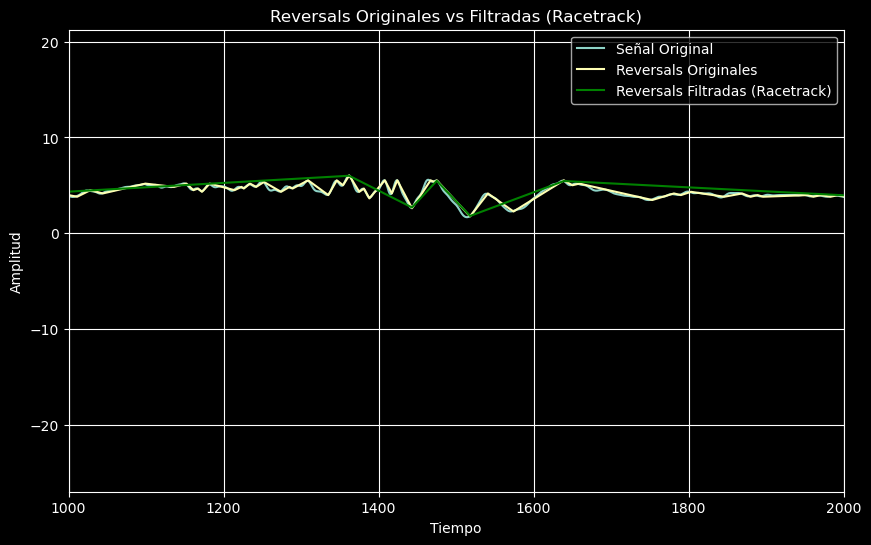

In [ ]:
# Crear el tiempo para el eje x
time = np.arange(len(y))
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
# Graficar la señal original
plt.plot(time, y, label='Señal Original')

# Graficar las reversals originales
plt.plot(ix, rev, linestyle='-', label='Reversals Originales')
# Graficar las reversals filtradas por racetrack
plt.plot(ix_rtf, rev_rtf, linestyle='-', color='green', label='Reversals Filtradas (Racetrack)')

# Configurar título y etiquetas de los ejes
plt.title('Reversals Originales vs Filtradas (Racetrack)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.xlim(1000, 2000)
#plt.ylim(-10, 20)

# Mostrar la gráfica
plt.grid(True)
plt.show()

In [ ]:
rev

array([ 0.03920156,  3.63600938,  3.46473281, ...,  0.38175469,
       -0.132075  ,  0.03920156])

# we can verify that all ranges below h=20(?) are removed by taking a look at the range-count plot or range-cumulative count plot. 

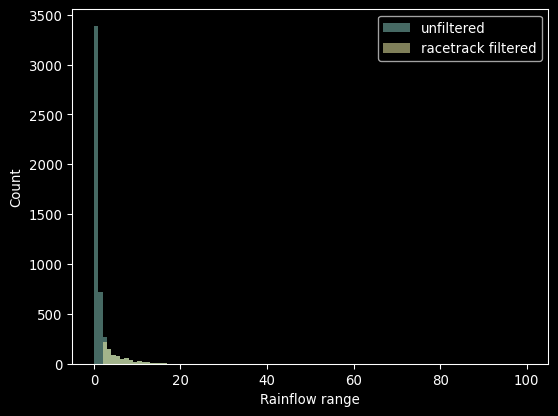

In [ ]:
ranges = fatpack.find_rainflow_ranges(rev, k=256)
ranges_rtf = fatpack.find_rainflow_ranges(rev_rtf, k=256)
bins = np.linspace(0, 100, 101)
N, S = fatpack.find_range_count(ranges, bins)
N_rtf, S_rtf = fatpack.find_range_count(ranges_rtf, bins)

plt.figure(dpi=96)
plt.bar(S, N, alpha=.5, width=1, label="unfiltered")
plt.bar(S_rtf, N_rtf, alpha=.5, width=1, label="racetrack filtered")
plt.legend()
plt.xlabel("Rainflow range")
plt.ylabel("Count")

plt.savefig('racetrack filtered.png')

# The racetrack filter has removed all rainflow ranges below h=20(?).

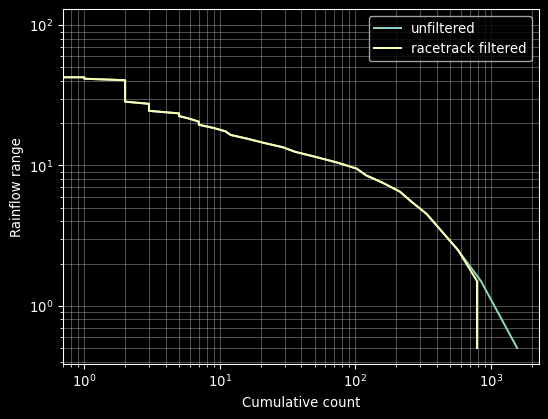

In [ ]:
Ncum = N.sum() - np.cumsum(N)
Ncum_rtf = N_rtf.sum() - np.cumsum(N_rtf)

plt.figure(dpi=96)
plt.loglog(Ncum, S, label="unfiltered")
plt.loglog(Ncum_rtf, S_rtf, label="racetrack filtered")
plt.legend()
plt.grid(which='both', alpha=.3)
plt.xlabel("Cumulative count")
plt.ylabel("Rainflow range")

plt.savefig('racetrack filtered-2.png')

# Plotting the cumulative distribution of the cycle count

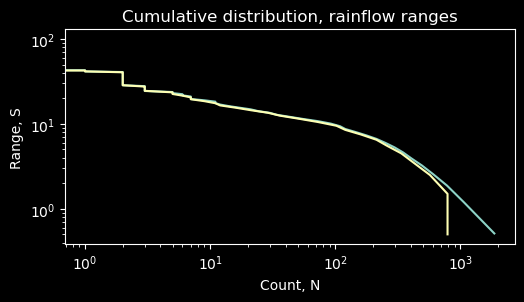

In [ ]:

plt.figure(figsize=(10, 8))
# Creating subplot
ax_cumdist = plt.subplot2grid((3, 2), (1, 0))
# Calculating cumulative distribution
N, S = fatpack.find_range_count(ranges, 64)
Ncum = N.sum() - np.cumsum(N)
# Plotting cumulative distribution
ax_cumdist.semilogx(Ncum, S)
ax_cumdist.set(title="Cumulative distribution, rainflow ranges",
               xlabel="Count, N", ylabel="Range, S")
plt.loglog(Ncum_rtf, S_rtf, label="racetrack filtered")
plt.tight_layout()  # Ajusta el diseño para que quepa todo correctamente
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (16,) and arg 5 with shape (602,).

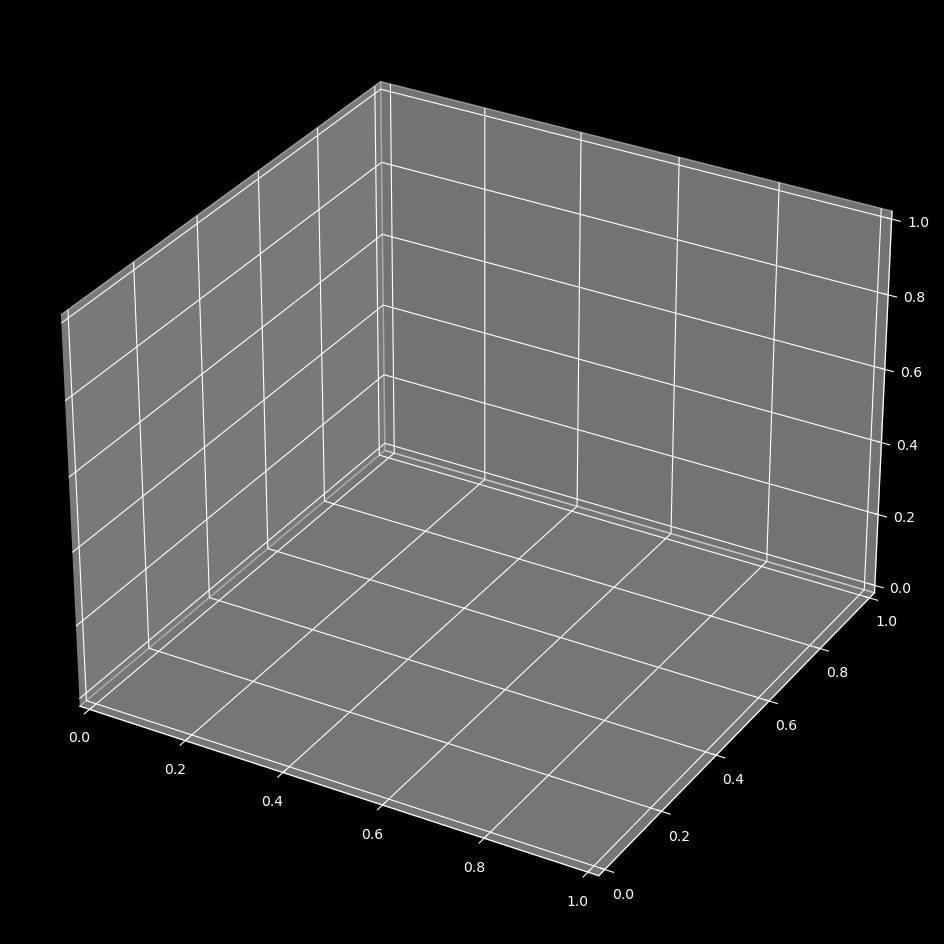

In [ ]:
ranges = fatpack.find_rainflow_ranges(rev, k=4)
ranges_rtf = fatpack.find_rainflow_ranges(rev_rtf, k=4)
#bins = np.linspace(0, 50, 101)
bins = np.linspace(0, 41, 5)
N, S = fatpack.find_range_count(ranges, bins)
# Datos de ejemplo (reemplaza con tus propios datos)
cycle_average = np.linspace(-1, 20, 50)
cycle_range = np.linspace(-1, 20, 50)
number_of_cycles = np.random.randint(0, 100, size=(50, 50))  # Número de ciclos para cada combinación

# Crea una figura 3D
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Crea una malla 3D
#X, Y = np.meshgrid(cycle_average, cycle_range)
X, Y = np.meshgrid(N, S)

# Grafica los datos
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(X).ravel(), 1, 1, ranges_rtf.ravel(), shade=True)

# Etiquetas de los ejes
ax.set_xlabel('Cycle Average')
ax.set_ylabel('Cycle Range')
ax.set_zlabel('Number of Cycles', rotation=90)
ax.set_title('Rainflow Matrix Histogram')
ax.view_init(elev=20, azim=30)
fig = plt.figure(figsize=(12, 8))  # Ajusta el tamaño según tus preferencia
plt.show()

In [ ]:
for i in np.arange(3, 100, 5):
    print(i)

    print(len(fatpack.find_rainflow_ranges(rev_rtf, k=i)))
    print()

3
79

8
560

13
734

18
780

23
788

28
788

33
788

38
789

43
789

48
788

53
788

58
788

63
788

68
789

73
789

78
789

83
789

88
788

93
789

98
789




Archivo a cargar: c:\Users\misasi.LEANET\Desktop\Rainflow - fatpack\HK-RBK.csv


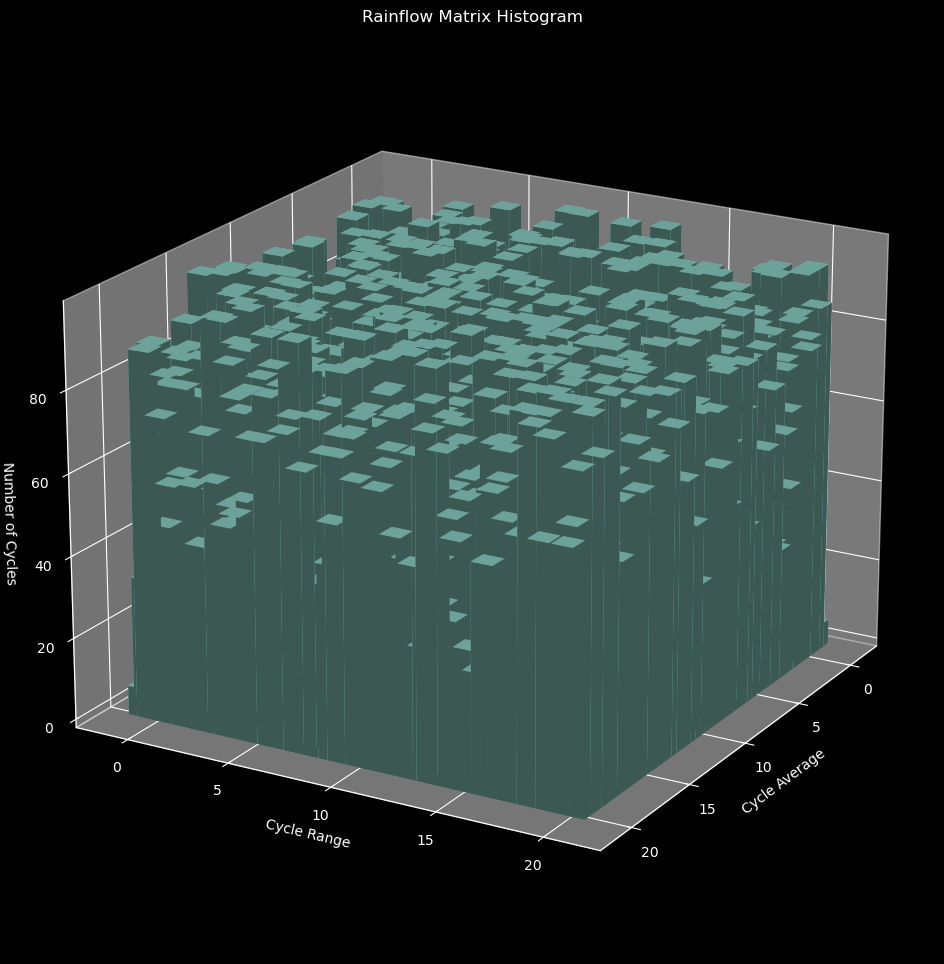

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Cargar datos desde el archivo CSV
csv_file = 'HK-RBK.csv'
file_path = os.path.join(current_directory, csv_file)
print(f"\nArchivo a cargar: {file_path}")
try:
    df = pd.read_csv(file_path)
    y = df.iloc[:, 0].values
    S, Sm = fatpack.find_rainflow_ranges(y, return_means=True, k=256)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo {csv_file}")

# Encontrar reversals
rev, ix = fatpack.find_reversals(y, k=256)
rev_rtf, ix_rtf = fatpack.find_reversals_racetrack_filtered(y, h=2, k=256)

# Calcular histogramas de rangos de ciclos
ranges = fatpack.find_rainflow_ranges(rev, k=256)
ranges_rtf = fatpack.find_rainflow_ranges(rev_rtf, k=256)
bins = np.linspace(0, 100, 101)
N, S = fatpack.find_range_count(ranges, bins)
N_rtf, S_rtf = fatpack.find_range_count(ranges_rtf, bins)
# if cumulative distribution needed
Ncum = N.sum() - np.cumsum(N)
Ncum_rtf = N_rtf.sum() - np.cumsum(N_rtf)

# Crear gráfico 3D del Rainflow Matrix Histogram
#X cycle average , Y cycle Range, Z Number of cycles
cycle_average = np.linspace(-1, 20, 50)
cycle_range = np.linspace(-1, 20, 50)

number_of_cycles = np.random.randint(0, 100, size=(50, 50))
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(cycle_average, cycle_range) 
dx = dy = 0.5
dz = number_of_cycles.flatten()
# Grafica los datos
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(X).ravel(), 1, 1, number_of_cycles.ravel(), shade=True)

# Etiquetas de los ejes
ax.set_xlabel('Cycle Average')
ax.set_ylabel('Cycle Range')
ax.set_zlabel('Number of Cycles', rotation=90)

# Título del gráfico
ax.set_title('Rainflow Matrix Histogram')

# Ajusta la vista
ax.view_init(elev=20, azim=30)
fig = plt.figure(figsize=(12, 8))  # Ajusta el tamaño según tus preferencias

# Muestra el gráfico
plt.show()



Archivo a cargar: c:\Users\misasi.LEANET\Desktop\Rainflow - fatpack\HK-RBK-2.csv
Error: No se encontró el archivo HK-RBK-2.csv


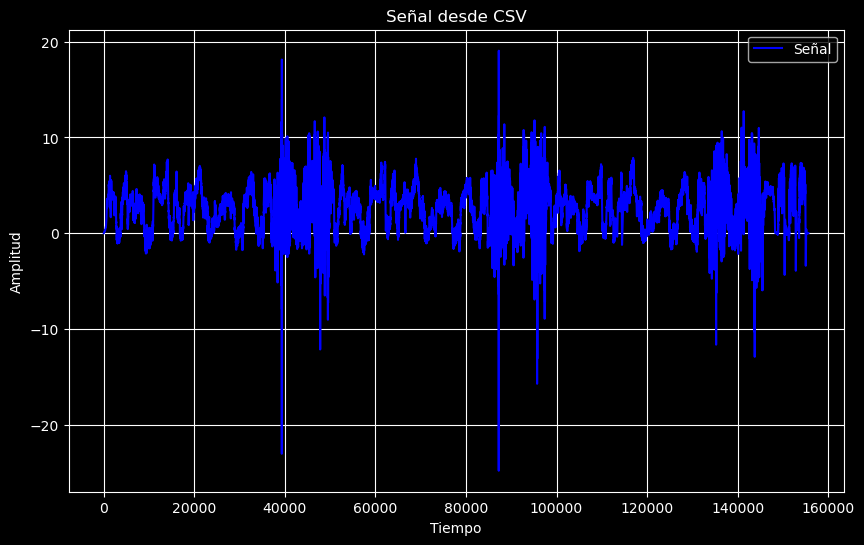

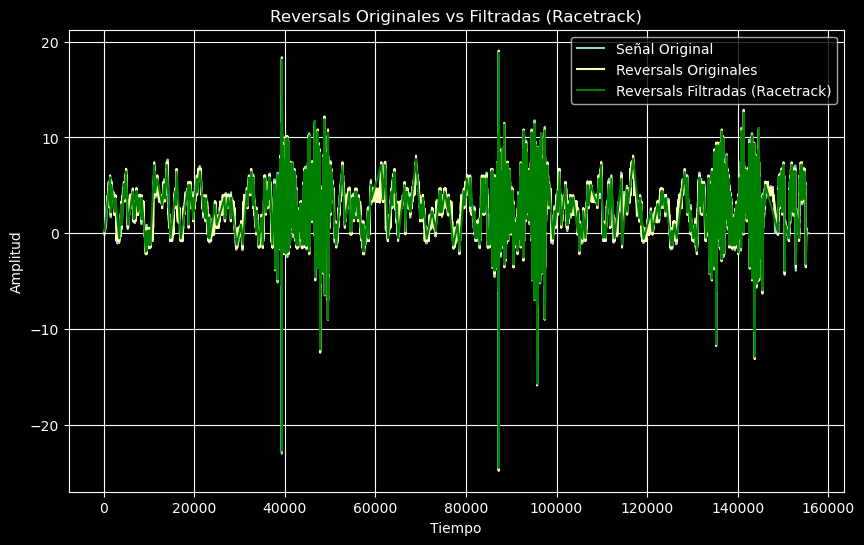

Text(0, 0.5, 'Rainflow range')

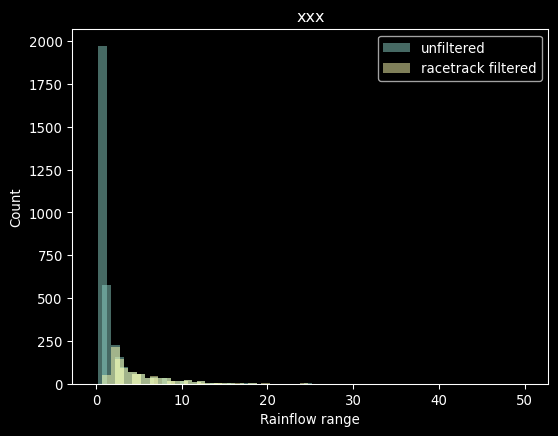

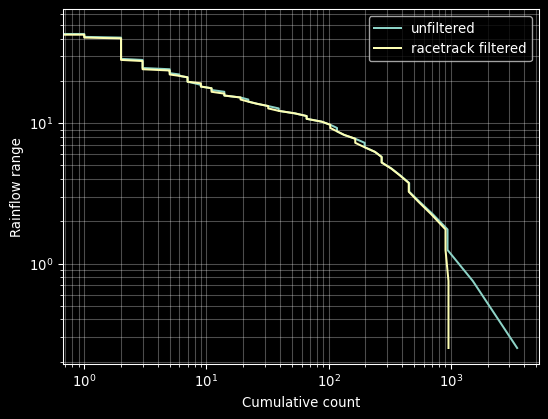

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import rainflow
import fatpack 
from math import sin, cos
import os 
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

current_directory = os.getcwd()
csv_file = 'HK-RBK-2.csv'
file_path = os.path.join(current_directory, csv_file)
print(f"\nArchivo a cargar: {file_path}")
try:
    df = pd.read_csv(file_path)
    print("\nPrimeros 20 registros:")
    print(df.head(20))
    # Extraer datos de las columnas "time" y "señal"
    time = df.iloc[:, 0].values  
    y = df.iloc[:, 1].values
    S, Sm = fatpack.find_rainflow_ranges(y, return_means=True, k=256)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo {csv_file}")
#time = range(len(y))
plt.figure(figsize=(10, 6))
plt.plot(time, y, label='Señal', color='blue')
plt.title('Señal desde CSV')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

rev, ix = fatpack.find_reversals(y, k=64)
rev_rtf, ix_rtf = fatpack.find_reversals_racetrack_filtered(y, h=1, k=64)

plt.figure(figsize=(10, 6))
plt.plot(time, y, label='Señal Original')
plt.plot(ix, rev, linestyle='-', label='Reversals Originales')
plt.plot(ix_rtf, rev_rtf, linestyle='-', color='green', label='Reversals Filtradas (Racetrack)')
plt.title('Reversals Originales vs Filtradas (Racetrack)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
#plt.xlim(1000, 2000)
#plt.ylim(-2, 2)
plt.grid(True)
plt.show()

ranges = fatpack.find_rainflow_ranges(rev, k=64)
ranges_rtf = fatpack.find_rainflow_ranges(rev_rtf, k=64)
bins = np.linspace(0, 50, 101)
N, S = fatpack.find_range_count(ranges, bins)
N_rtf, S_rtf = fatpack.find_range_count(ranges_rtf, bins)

plt.figure(dpi=96)
plt.bar(S, N, alpha=.5, width=1, label="unfiltered")
plt.bar(S_rtf, N_rtf, alpha=.5, width=1, label="racetrack filtered")
plt.title('xxx')
plt.legend()
plt.xlabel("Rainflow range")
plt.ylabel("Count")

Ncum = N.sum() - np.cumsum(N)
Ncum_rtf = N_rtf.sum() - np.cumsum(N_rtf)

plt.figure(dpi=96)
plt.loglog(Ncum, S, label="unfiltered")
plt.loglog(Ncum_rtf, S_rtf, label="racetrack filtered")
plt.title('xxx')
plt.legend()
plt.grid(which='both', alpha=.3)
plt.xlabel("Cumulative count")
plt.ylabel("Rainflow range")
